In [1]:
'''
Data Standardization => Implementation
Data Normalization => Implementation
Binning => What is Binning? 
'''
import pandas as pd

In [2]:
path = '/home/phd/auto.csv'
df = pd.read_csv(path, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
df.columns = headers

In [6]:
import numpy as np

In [7]:
df.replace('?',np.nan, inplace=True)

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
m = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, m, inplace=True)

In [10]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [11]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
df['normalized-losses'].head(20)

0     122
1     122
2     122
3     164
4     164
5     122
6     158
7     122
8     158
9     122
10    192
11    192
12    188
13    188
14    122
15    122
16    122
17    122
18    121
19     98
Name: normalized-losses, dtype: object

In [13]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [14]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [15]:
df['peak-rpm']

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object

In [16]:
df['peak-rpm'] = df['peak-rpm'].astype('float')

In [17]:
df['peak-rpm']

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
200    5400.0
201    5300.0
202    5500.0
203    4800.0
204    5400.0
Name: peak-rpm, Length: 205, dtype: float64

In [18]:
# Data Standardization..... 
df['city-mpg']

0      21
1      21
2      19
3      24
4      18
       ..
200    23
201    19
202    18
203    26
204    19
Name: city-mpg, Length: 205, dtype: int64

In [19]:
df['highway-mpg']

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highway-mpg, Length: 205, dtype: int64

In [20]:
#L/100 KM = 235 / mpg value
df[['city-mpg','highway-mpg']]

,city-mpg,highway-mpg
0,21,27
1,21,27
2,19,26
3,24,30
4,18,22
...,...,...
200,23,28
201,19,25
202,18,23
203,26,27


In [21]:
df['city-mpg'] = 235 / df['city-mpg']

In [22]:
df['highway-mpg'] = 235/df['highway-mpg']

In [23]:
df[['city-mpg','highway-mpg']].head(20)

,city-mpg,highway-mpg
0,11.190476,8.703704
1,11.190476,8.703704
2,12.368421,9.038462
3,9.791667,7.833333
4,13.055556,10.681818
5,12.368421,9.400000
6,12.368421,9.400000
7,12.368421,9.400000
8,13.823529,11.750000
9,14.687500,10.681818


In [24]:
df.rename(columns={'city-mpg':'city-L/100KM'}, inplace=True)

In [25]:
df.rename(columns={'highway-mpg':'highway-L/100KM'},inplace=True)

In [26]:
df[['city-L/100KM','highway-L/100KM']].head(20)

,city-L/100KM,highway-L/100KM
0,11.190476,8.703704
1,11.190476,8.703704
2,12.368421,9.038462
3,9.791667,7.833333
4,13.055556,10.681818
5,12.368421,9.400000
6,12.368421,9.400000
7,12.368421,9.400000
8,13.823529,11.750000
9,14.687500,10.681818


In [27]:
'''
......Normalization..... 
Range ==> 0 --- 1

168.8  => 168.8/188.8 ==> 0 -- 1
168.8  => 168.8/188.8 ==> 0 -- 1
171.2  => 171.2/188.8 ==> 0 -- 1
176.6  => 176.6/188.8 ==> 0 -- 1
188.8  => 188.8/188.8 ==> 1

'''
df['length']

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: length, Length: 205, dtype: float64

In [28]:
df['length'].min()

141.1

In [29]:
df['length'].max()

208.1

In [30]:
df[['length','width','height']].head(20)

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
5,177.3,66.3,53.1
6,192.7,71.4,55.7
7,192.7,71.4,55.7
8,192.7,71.4,55.9
9,178.2,67.9,52.0


In [31]:
df['length'] = df['length']/df['length'].max()

In [32]:
df['length'].head()

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length, dtype: float64

In [33]:
df['length'].max()

1.0

In [34]:
df['length'].min()

0.6780394041326285

In [35]:
df['width']  = df['width'] /df['width'].max()

In [36]:
df['height'] = df['height']/df['height'].max()

In [37]:
df[['length','height','width']].head(27)

,length,height,width
0,0.811148,0.816054,0.886584
1,0.811148,0.816054,0.886584
2,0.822681,0.876254,0.905947
3,0.848630,0.908027,0.915629
4,0.848630,0.908027,0.918396
5,0.851994,0.887960,0.917012
6,0.925997,0.931438,0.987552
7,0.925997,0.931438,0.987552
8,0.925997,0.934783,0.987552
9,0.856319,0.869565,0.939142


In [39]:
''' Binning + Visualization '''
# matplotlib
# seaborn
# Binning ....
df['horsepower'].head(20)

0     111
1     111
2     154
3     102
4     115
5     110
6     110
7     110
8     140
9     160
10    101
11    101
12    121
13    121
14    121
15    182
16    182
17    182
18     48
19     70
Name: horsepower, dtype: object

In [41]:
df['horsepower'].isnull().sum()

2

In [43]:
avg = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg, inplace=True)

In [44]:
df['horsepower'].isnull().sum()

0

In [45]:
df['horsepower'] = df['horsepower'].astype('int')

In [46]:
df['horsepower'].head(20)

0     111
1     111
2     154
3     102
4     115
5     110
6     110
7     110
8     140
9     160
10    101
11    101
12    121
13    121
14    121
15    182
16    182
17    182
18     48
19     70
Name: horsepower, dtype: int64

In [47]:
# histogram
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
62      6
101     6
160     6
88      6
145     5
102     5
84      5
97      5
76      5
82      5
123     4
86      4
92      4
111     4
90      3
85      3
73      3
207     3
152     3
182     3
121     3
112     2
52      2
56      2
184     2
176     2
162     2
161     2
155     2
156     2
100     2
94      2
104     2
200     1
288     1
48      1
120     1
55      1
106     1
58      1
60      1
64      1
142     1
143     1
175     1
72      1
134     1
135     1
78      1
115     1
154     1
140     1
262     1
Name: horsepower, dtype: int64

In [48]:
import matplotlib as plt
from matplotlib import pyplot

(array([55., 49., 51., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

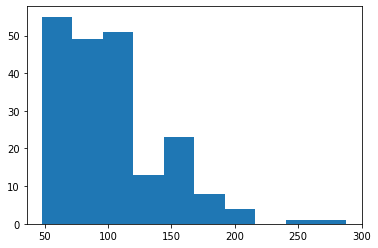

In [49]:
#x-axis=== Label
#y-axis == Label
plt.pyplot.hist(df['horsepower'])

In [50]:
df['horsepower'].min()

48

In [51]:
df['horsepower'].max()

288

(array([55., 49., 51., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

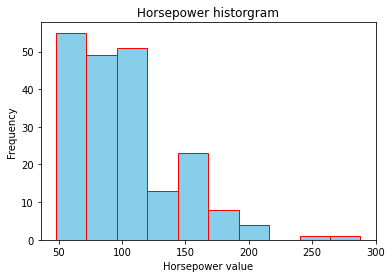

In [58]:
plt.pyplot.title('Horsepower historgram')
plt.pyplot.xlabel('Horsepower value')
plt.pyplot.ylabel('Frequency')
plt.pyplot.hist(df['horsepower'], color='skyblue',ec='red')

In [59]:
#Binning..... Continous Numerical Values => Discrete Categorical Values...

'''
Marks 
71 => B
87 => A
63 => C
57 => D
92 => A+
67 => C
74 => B
85 => A
96 => A+
53 => D

>=50 and <60 D
>=60 and <70 C
>=70 and <80 B
>=80 and <90 A
>=90 and <=100 A+
Categories =5 (A+,A,B,C,D)
pinpoints =6
50-60-70-80-90-100
BINNING...
'''
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [60]:
df['horsepower'].min()

48

In [61]:
df['horsepower'].max()

288

In [62]:
import numpy as np

In [63]:
b = np.linspace(min(df['horsepower']),max(df['horsepower']),4)

In [64]:
b

array([ 48., 128., 208., 288.])

In [65]:
labl = ['Average','Good','Best']

In [66]:
df['horsepower'].head(20)

0     111
1     111
2     154
3     102
4     115
5     110
6     110
7     110
8     140
9     160
10    101
11    101
12    121
13    121
14    121
15    182
16    182
17    182
18     48
19     70
Name: horsepower, dtype: int64

In [67]:
df['horsepower-bin'] = pd.cut(df['horsepower'],b,labels=labl,include_lowest=True)

In [68]:
df[['horsepower','horsepower-bin']].head(30)

,horsepower,horsepower-bin
0,111,Average
1,111,Average
2,154,Good
3,102,Average
4,115,Average
5,110,Average
6,110,Average
7,110,Average
8,140,Good
9,160,Good


In [69]:
df['horsepower-bin'].value_counts()

Average    163
Good        40
Best         2
Name: horsepower-bin, dtype: int64

(array([163.,   0.,   0.,   0.,   0.,  40.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

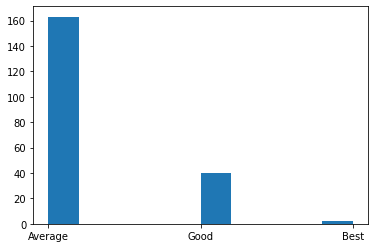

In [70]:
plt.pyplot.hist(df['horsepower-bin'])

<BarContainer object of 3 artists>

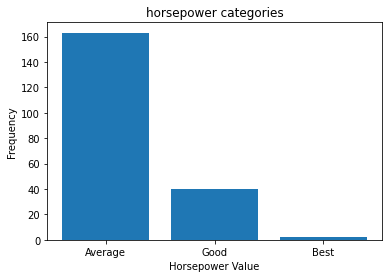

In [71]:
plt.pyplot.title('horsepower categories')
plt.pyplot.ylabel('Frequency')
plt.pyplot.xlabel('Horsepower Value')
plt.pyplot.bar(labl,df['horsepower-bin'].value_counts())

In [72]:
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100KM,highway-L/100KM,price,horsepower-bin
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495,Average
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500,Average
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500,Good
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950,Average
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450,Average
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,15250,Average
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,17710,Average
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500.0,12.368421,9.400000,18920,Average
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500.0,13.823529,11.750000,23875,Good
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500.0,14.687500,10.681818,NaN,Good


In [ ]:
ca